<a href="https://colab.research.google.com/github/justcme/PerformanceSpecs/blob/main/C_DataExplorationCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lipid Panel Performance Recommendations
### Data Cleaning

*   Loaded data from NHANES.
*   Renamed variables.
*   Encoded categorical variables.
*   Reordered columns.
*   Addressed "missingness".
*   Added variable column (not on BP treatment) required for PCE calculation
*   Applied exclusion criteria.
*   Selected columns required for analysis.


# SETUP

OS

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks/LipidPerf")

Mounted at /content/drive/


Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA

In [ ]:
data1 = pd.read_csv("NHANES_RAW.csv")  #Original Lipid Data

# Data Exploration

In [ ]:
data1

,ID,ethnicity,age,gender,current bp meds,current smoker,diabetes,current lipid meds,GLU,HDL,TC,TG,SBP,DBP
0,31131,NH B,44,F,1.0,0.0,0.0,0.0,90,39,105,86,139.0,73.000000
1,31132,NH W,70,M,1.0,0.0,1.0,1.0,157,59,147,65,131.0,56.000000
2,31133,NH B,16,F,0.0,0.0,0.0,NaN,84,54,147,61,119.0,47.000000
3,31134,NH W,73,M,1.0,0.0,0.0,1.0,100,49,186,195,120.0,67.000000
4,31148,NH W,16,F,0.0,0.0,0.0,NaN,91,53,126,67,107.0,51.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28717,124815,NH B,52,M,NaN,0.0,0.0,NaN,102,67,203,51,140.0,86.666667
28718,124817,Mexican,67,F,NaN,NaN,1.0,1.0,81,60,200,112,112.0,67.333333
28719,124818,NH B,40,M,NaN,NaN,0.0,NaN,96,50,234,71,103.0,67.333333
28720,124821,NH B,63,M,1.0,NaN,1.0,0.0,125,44,155,52,124.0,66.666667


In [ ]:
data1.shape

(28722, 14)

In [ ]:
data1.dtypes

ID                      int64
ethnicity              object
age                     int64
gender                 object
current bp meds       float64
current smoker        float64
diabetes              float64
current lipid meds    float64
GLU                     int64
HDL                     int64
TC                      int64
TG                      int64
SBP                   float64
DBP                   float64
dtype: object

In [ ]:
data1.isnull().sum()

ID                        0
ethnicity                 0
age                       0
gender                    0
current bp meds        6002
current smoker         5493
diabetes                 18
current lipid meds    11733
GLU                       0
HDL                       0
TC                        0
TG                        0
SBP                       0
DBP                     394
dtype: int64

In [ ]:
data1.describe(include = 'all')

,ID,ethnicity,age,gender,current bp meds,current smoker,diabetes,current lipid meds,GLU,HDL,TC,TG,SBP,DBP
count,28722.000000,28722,28722.000000,28722,22720.000000,23229.000000,28704.000000,16989.000000,28722.000000,28722.000000,28722.000000,28722.000000,28722.000000,28328.000000
unique,NaN,7,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NH W,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11138,NaN,14548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,81475.166667,NaN,43.806072,NaN,0.295731,0.200009,0.135974,0.277650,105.932317,53.722408,184.233967,121.829817,121.308614,69.197555
std,29025.256746,NaN,20.885156,NaN,0.456381,0.400015,0.342767,0.447853,34.525144,15.486417,41.963119,94.450695,18.465471,12.587972
min,31131.000000,NaN,12.000000,NaN,0.000000,0.000000,0.000000,0.000000,21.000000,5.000000,66.000000,10.000000,65.000000,4.000000
25%,55881.250000,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.000000,91.000000,43.000000,154.000000,67.000000,108.666667,61.000000
50%,81565.000000,NaN,44.000000,NaN,0.000000,0.000000,0.000000,0.000000,98.000000,51.000000,180.000000,98.000000,118.000000,69.000000
75%,111739.750000,NaN,61.000000,NaN,1.000000,0.000000,0.000000,1.000000,108.000000,62.000000,210.000000,147.000000,131.000000,77.000000


In [ ]:
data1.ethnicity.unique()

array(['NH B', 'NH W', 'other', 'Mexican', 'Hispanic', 'NH Asian',
       'other Hispanic'], dtype=object)

In [ ]:
data1.gender.unique()

array(['F', 'M'], dtype=object)

In [ ]:
data1.columns

Index(['ID', 'ethnicity', 'age', 'gender', 'current bp meds', 'current smoker',
       'diabetes', 'current lipid meds', 'GLU', 'HDL', 'TC', 'TG', 'SBP',
       'DBP'],
      dtype='object')

In [ ]:
numdata = data1[['age','GLU', 'HDL', 'TC', 'TG', 'SBP', 'DBP']]
catdata = data1[['ethnicity', 'gender', 'current bp meds', 'current smoker', 'diabetes', 'current lipid meds']]

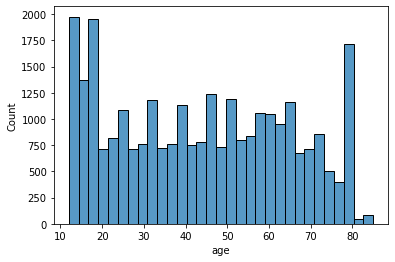

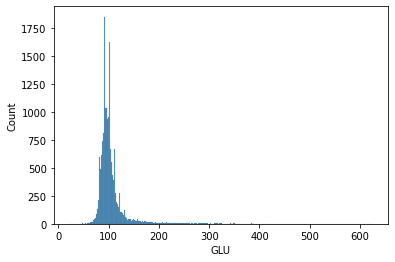

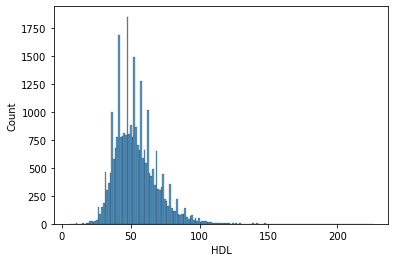

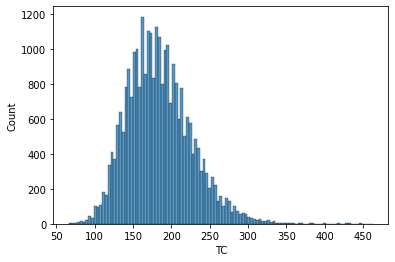

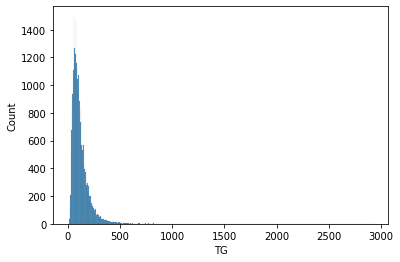

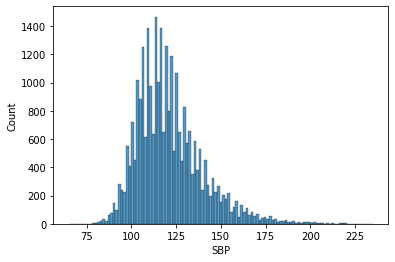

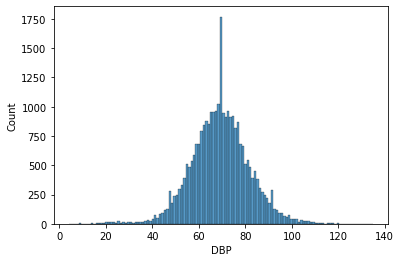

In [ ]:
for col in numdata.columns:
  sns.histplot(data=numdata, x = col)
  plt.show()

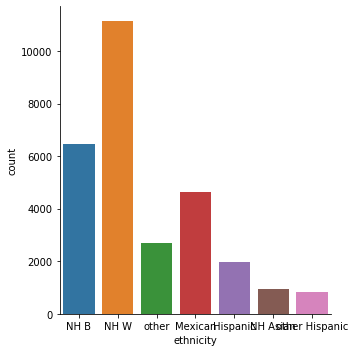

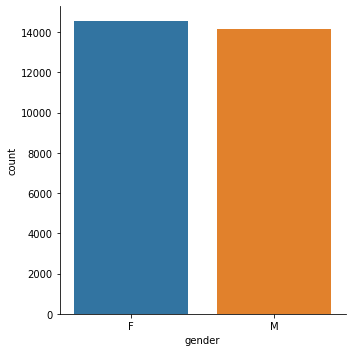

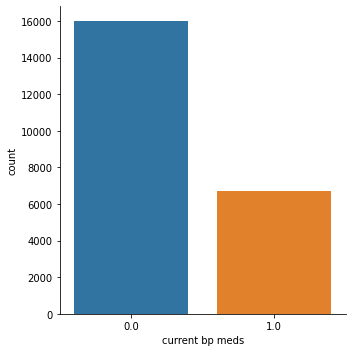

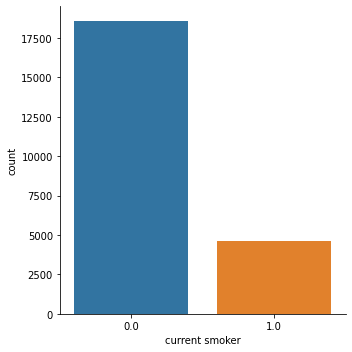

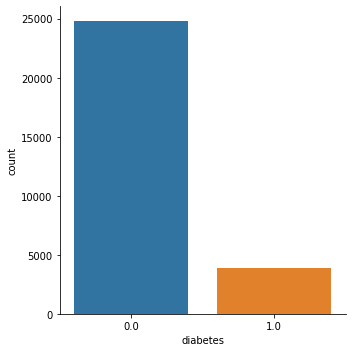

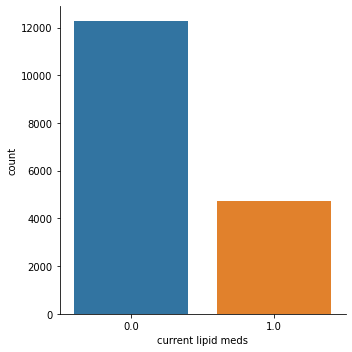

In [ ]:
for col in catdata.columns:
  sns.catplot(data = catdata, x = col, kind = 'count')
  plt.show()

# Data Cleaning

Rename Variables

In [ ]:
# Rename columns with simpler headers
data1.rename(columns = {'ethnicity':'race', 'gender': 'sex', 'current bp meds': 'BPRx', 'current smoker': 'smoker', 'diabetes': 'DM',
                        'current lipid meds': 'LipRx'}, inplace = True)

Encoding Binary Categorical Variables

In [ ]:
# Find the unique values in the 'ethnicity' and 'gender' columns
#print('ethnicities: ', data1['ethnicity'].unique())
#print('genders: ', data1['gender'].unique())

# Encode 'Non-Hispanic Black' as '1' and all other ethnicities as '0'
df_obj = {'race': {'NH B': 1, 'NH W': 0, 'other': 0, 'Mexican': 0, 'Hispanic': 0, 'NH Asian': 0, 'other Hispanic': 0}, 'sex': {'F':1, 'M':0}}
data1 = data1.replace(df_obj)

Missingness

In [ ]:
# Investigate missing values
#data1.isnull().sum()   #shows the number of missing values per column
#data1[data1['DM'].isnull()].index.tolist()   #gives the row numbers of missing values in the DM column
##Give the glucose results for patients with missing DM data
#data1.iloc[[311, 1617, 2214, 4395, 5188, 5788, 8385, 8393, 9972, 10964, 16016, 16804, 19070, 19417, 23022, 25693, 27360, 28118],13]   

# Replace missing values (NaN) with 0 where it made sense to do so (Answers were taken as "No" if not stated)
data2 = data1.copy()      # Made a copy of the dataframe to avoid issues with "copy of a slice" errors
data2.update(data2[['BPRx', 'smoker', 'LipRx', 'DBP']].fillna(0))

  # Patients with unknown diabetes status were excluded.
data2.update(data2[['DM']].fillna(2))

Adjust Data Type

Add Column

Reorder Columns

In [ ]:
# Made all numerical values integers
data2[data2.columns[2:]] = data2[data2.columns[2:]].astype('int')

# Add "Not on BP meds column"
data2.loc[:,'BPRxn'] = np.where(data2['BPRx']== 1, 0, 1)

# Reorder columns
data2 = data2.reindex(columns = ['ID', 'age', 'race', 'sex', 'SBP', 'BPRx', 'BPRxn', 'LipRx', 'smoker', 'DM', 'HDL', 'TC', 'TG'])

Apply Exlusion Criteria

In [ ]:
# Make a copy of dataframe and confirm original N
data3 = data2.copy()
print(len(data3.index))    

# Exclusions: Diabetics, On Lipid Meds, not 40-75 yrs old (inclusive), Triglycerides >400mg/dL
data3 = data3.loc[(data3['DM']==0) & (data3['LipRx']==0) & (data3['age'] >= 40) & (data3['age']<= 75) & (data3['TG'] <=400)]

# New N after exclusions
data3 = data3.reset_index(drop = True)
print(len(data3.index))
data3.head()

28722
8506


,ID,age,race,sex,SBP,BPRx,BPRxn,LipRx,smoker,DM,HDL,TC,TG
0,31131,44,1,1,139,1,0,0,0,0,39,105,86
1,31153,44,0,1,121,1,0,0,0,0,50,198,256
2,31158,71,0,0,146,0,1,0,1,0,71,199,88
3,31193,51,0,0,149,0,1,0,1,0,40,214,125
4,31205,43,0,1,137,0,1,0,0,0,43,163,127


Select Columns

In [ ]:
# Drop unneeded columns
df8000 = data3.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12]]
df8000['dLDL'] = df8000['TC'] - (df8000['HDL'] + df8000['TG']/5)

# print(df8000.info())
df8000.head()

,ID,age,race,sex,SBP,BPRx,BPRxn,smoker,DM,HDL,TC,TG,dLDL
0,31131,44,1,1,139,1,0,0,0,39,105,86,48.8
1,31153,44,0,1,121,1,0,0,0,50,198,256,96.8
2,31158,71,0,0,146,0,1,1,0,71,199,88,110.4
3,31193,51,0,0,149,0,1,1,0,40,214,125,149.0
4,31205,43,0,1,137,0,1,0,0,43,163,127,94.6


In [ ]:
numdata2 = df8000[['age', 'SBP','HDL', 'TC', 'TG','dLDL']]
catdata2 = df8000[['race', 'sex', 'BPRx', 'smoker', 'DM']]

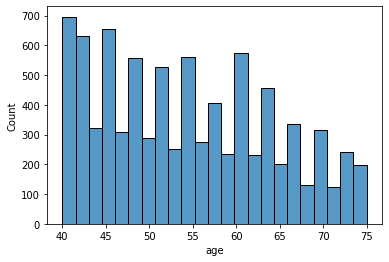

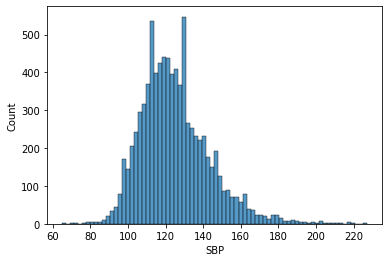

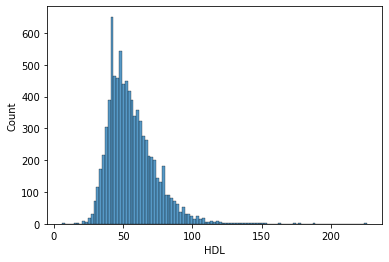

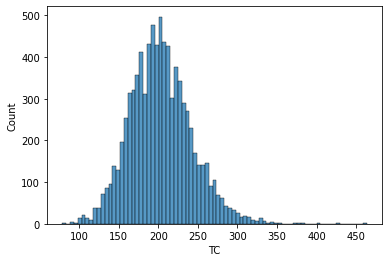

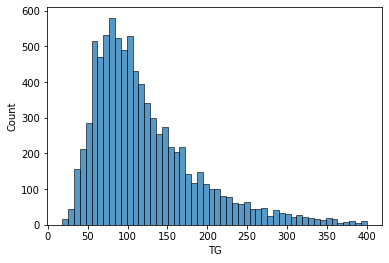

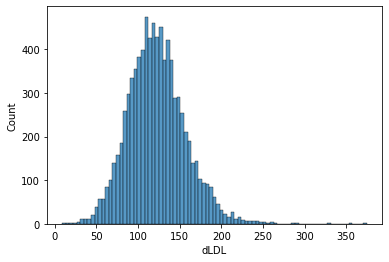

In [ ]:
for col in numdata2.columns:
  sns.histplot(data=numdata2, x = col)
  plt.show()

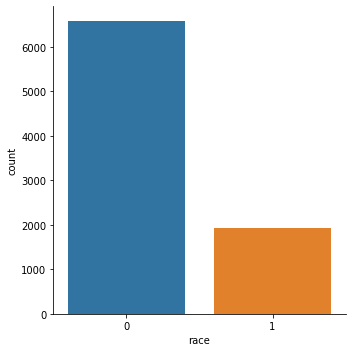

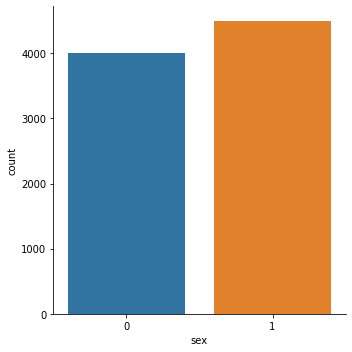

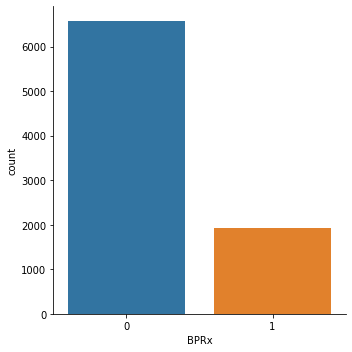

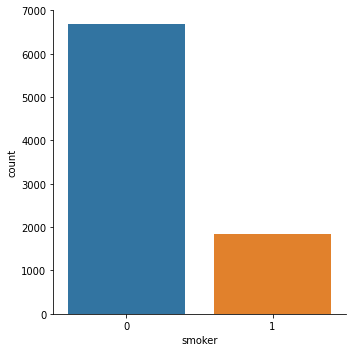

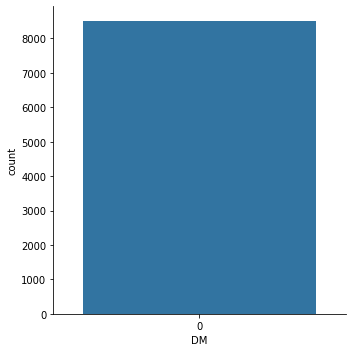

In [ ]:
for col in catdata2.columns:
  sns.catplot(data = catdata2, x = col, kind = 'count')
  plt.show()

# Save new dataframes to .CSV files in *Base* folder

In [ ]:
df8000.to_csv('from_Pandas/Base/df8000.csv', index = False)